<a href="https://colab.research.google.com/github/dhanhyuti/assignment/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# 1. Load the dataset and print number of records and columns
comcast_data = pd.read_csv('/content/Comcast.csv')
print("Number of records:", comcast_data.shape[0])
print("Number of columns:", comcast_data.shape[1])

# 2. Separate numerical and categorical data types
numerical_features = comcast_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = comcast_data.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical features:", numerical_features)
print("Categorical features:", categorical_features)

# 3. Print the number of complaints as per the type of status
print("\nNumber of complaints as per status:\n", comcast_data['Status'].value_counts())

# 4. Print the records of the complaints received via "Internet"
print("\nComplaints received via Internet:\n", comcast_data[comcast_data['Received Via'] == 'Internet'])

# 5. Print the name of the state which received the maximum number of complaints
max_complaint_state = comcast_data['State'].value_counts().idxmax()
print("\nState with maximum complaints:", max_complaint_state)

# 6. Print the records of the customers from city "Atlanta" where complaints are received via "Customer Care Call"
atlanta_customer_care_complaints = comcast_data[
    (comcast_data['City'] == 'Atlanta') & (comcast_data['Received Via'] == 'Customer Care Call')
]
print("\nAtlanta customer care complaints:\n", atlanta_customer_care_complaints)

# 7. Drop the ticket#
comcast_data = comcast_data.drop('Ticket #', axis=1)

# 8. Print the number of open and closed complaints as per the "Zip code"
open_closed_complaints_by_zipcode = comcast_data.groupby(['Zip code', 'Status'])['Status'].count()
print("\nOpen and closed complaints per Zipcode:\n", open_closed_complaints_by_zipcode)

# 9. Print the names of the columns
print("\nColumn names:", comcast_data.columns)

# 10. Print the second and third column
print("\nSecond and third columns:\n", comcast_data[['Customer Complaint', 'Date']]) # Assuming these are the 2nd and 3rd columns after dropping Ticket #

# To see the output, run the code.

Number of records: 2224
Number of columns: 11

Numerical features: ['Zip code']
Categorical features: ['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via', 'City', 'State', 'Status', 'Filing on Behalf of Someone']

Number of complaints as per status:
 Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64

Complaints received via Internet:
      Ticket #                                 Customer Complaint      Date  \
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
5      338519  ISP Charging for arbitrary data limits with ov...  06-12-15   
...       ...                                                ...       ...   
2212   326963                            

Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose             

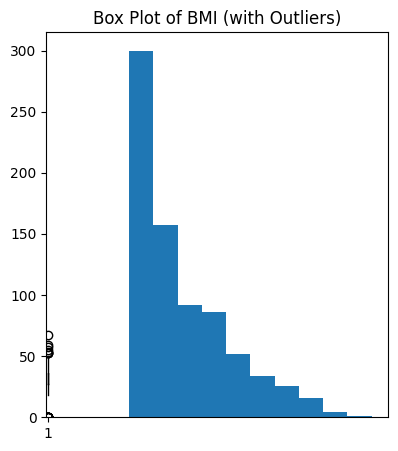

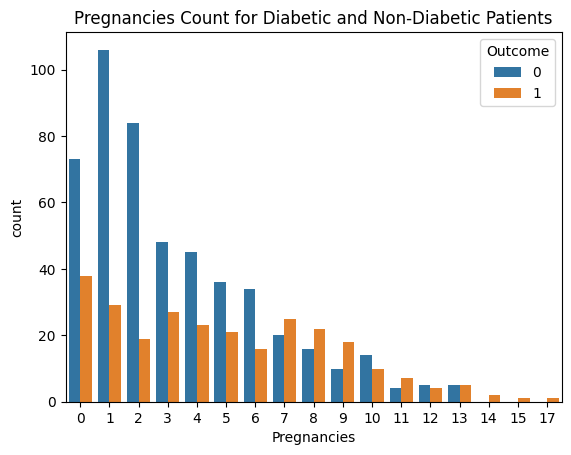

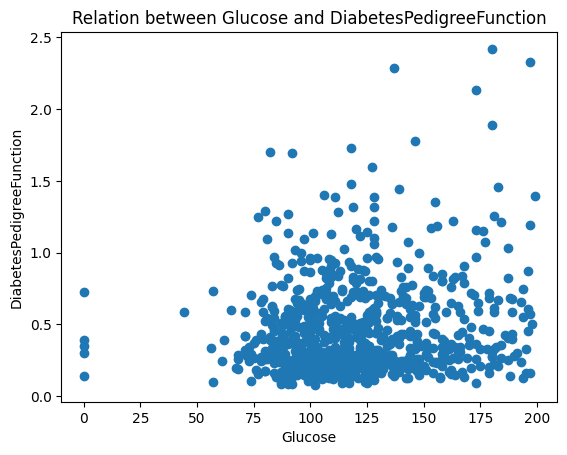


Diabetic patients or those with glucose > 150:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0               

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

# 1. Print the correlation matrix and inferences on factors influencing BMI
correlation_matrix = diabetes_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Inferences:
# Look for columns with high correlation with BMI (e.g., > 0.5 or < -0.5)
# Example: If 'Glucose' has a high positive correlation with 'BMI', it suggests that higher glucose levels are associated with higher BMI.

# 2. Print the number of patients who have diabetes
num_diabetic_patients = diabetes_data['Outcome'].sum()
print("\nNumber of diabetic patients:", num_diabetic_patients)

# 3. Print the records of the patients who have BMI between 35 to 40
bmi_filtered_data = diabetes_data[(diabetes_data['BMI'] >= 35) & (diabetes_data['BMI'] <= 40)]
print("\nPatients with BMI between 35 and 40:\n", bmi_filtered_data)

# 4. Print specific columns for patients with BloodPressure > 100
filtered_data = diabetes_data[diabetes_data['BloodPressure'] > 100][['BloodPressure', 'BMI', 'Outcome']]
print("\nBloodPressure, BMI, and Outcome for patients with BloodPressure > 100:\n", filtered_data)

# 5. Univariate analysis on Age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(diabetes_data['Age'], bins=10)

# 6. Calculate outliers for BMI
z_scores = np.abs(stats.zscore(diabetes_data['BMI']))
outliers = diabetes_data[(z_scores > 3)]  # Using a threshold of 3 standard deviations

print("\nOutliers for BMI:\n", outliers)

plt.boxplot(diabetes_data['BMI'])
plt.title('Box Plot of BMI (with Outliers)')
plt.show()

# 7. Bar chart of pregnancies for diabetic and non-diabetic patients
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes_data)
plt.title('Pregnancies Count for Diabetic and Non-Diabetic Patients')
plt.show()

# 8. Relation between Glucose and DiabetesPedigreeFunction
plt.scatter(diabetes_data['Glucose'], diabetes_data['DiabetesPedigreeFunction'])
plt.title('Relation between Glucose and DiabetesPedigreeFunction')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

# 9. Print records of diabetic patients or those with glucose > 150
filtered_data = diabetes_data[(diabetes_data['Outcome'] == 1) | (diabetes_data['Glucose'] > 150)]
print("\nDiabetic patients or those with glucose > 150:\n", filtered_data)

